<a href="https://colab.research.google.com/github/CidClayQuirino/TrincaBracoPC360_PC350/blob/main/PC350_360Crack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivo carregado com sucesso!
Total de registros após limpeza: 132


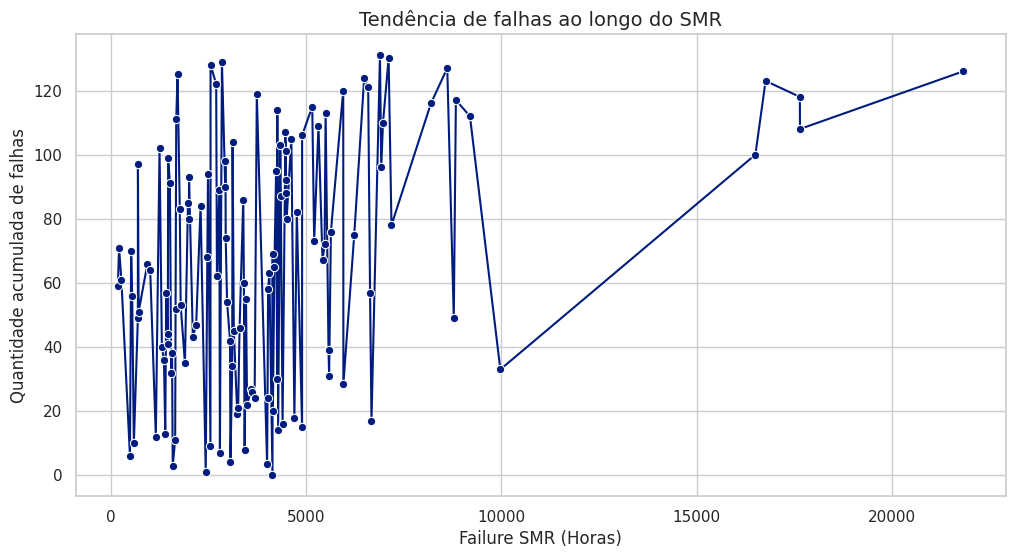

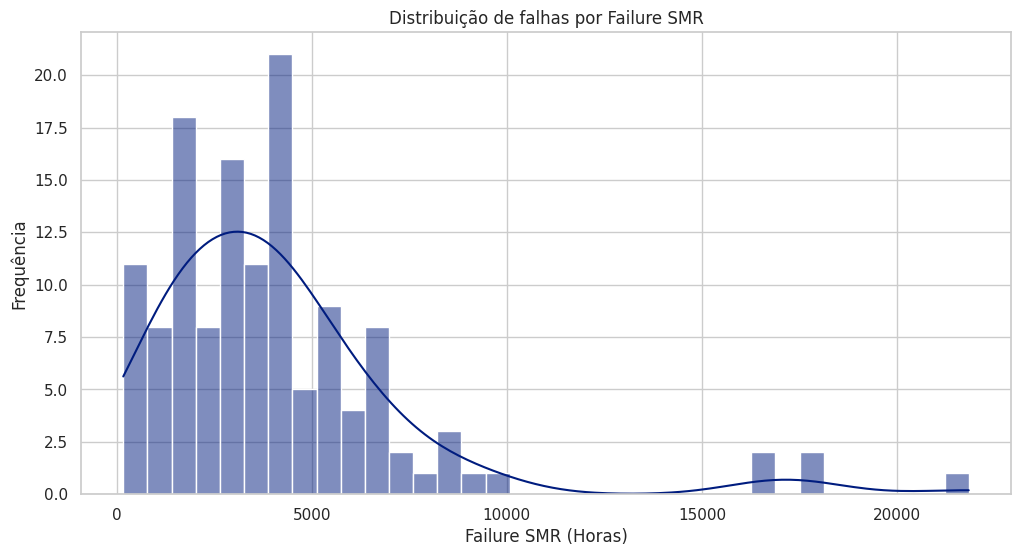

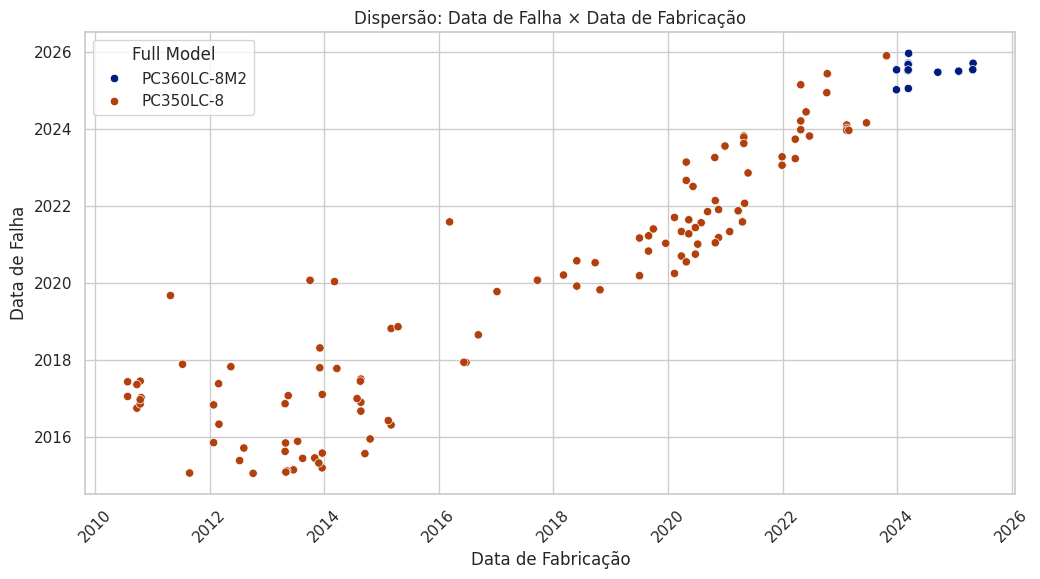

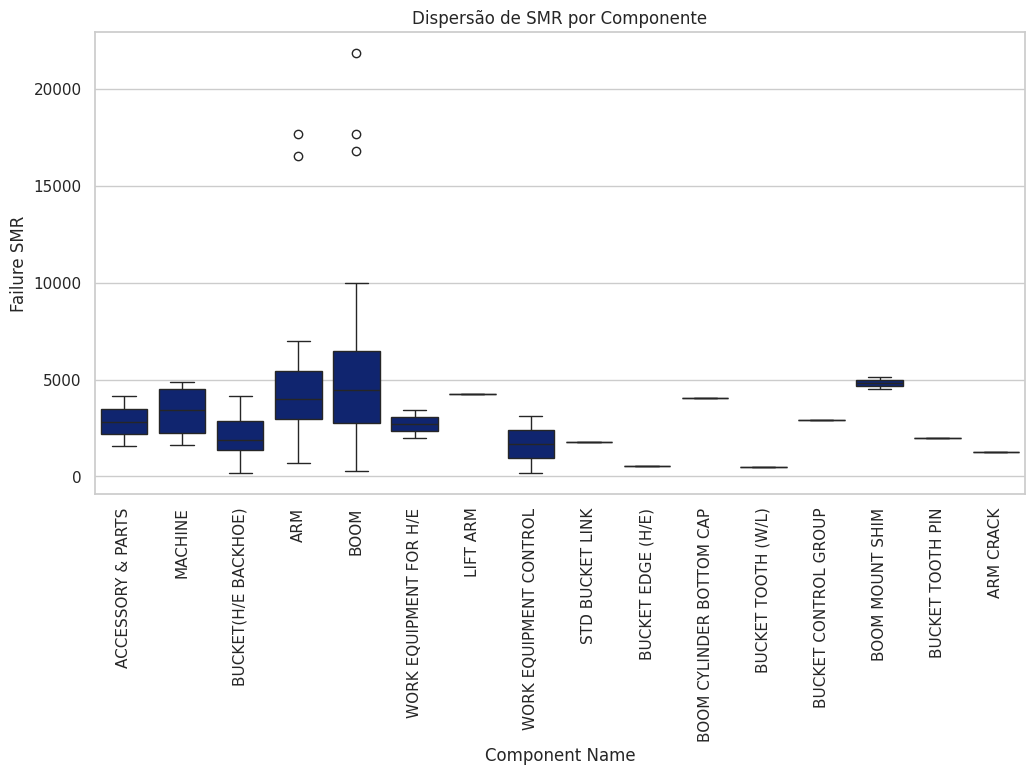

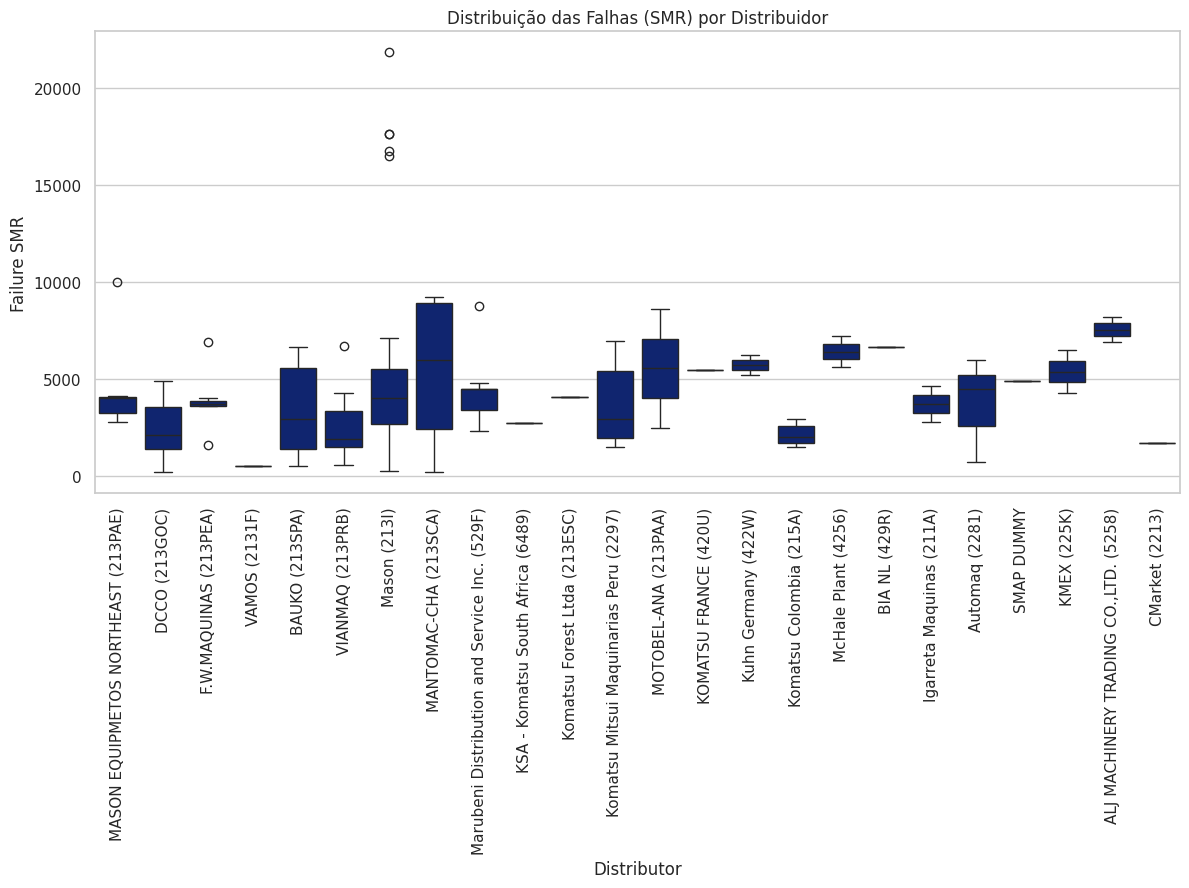

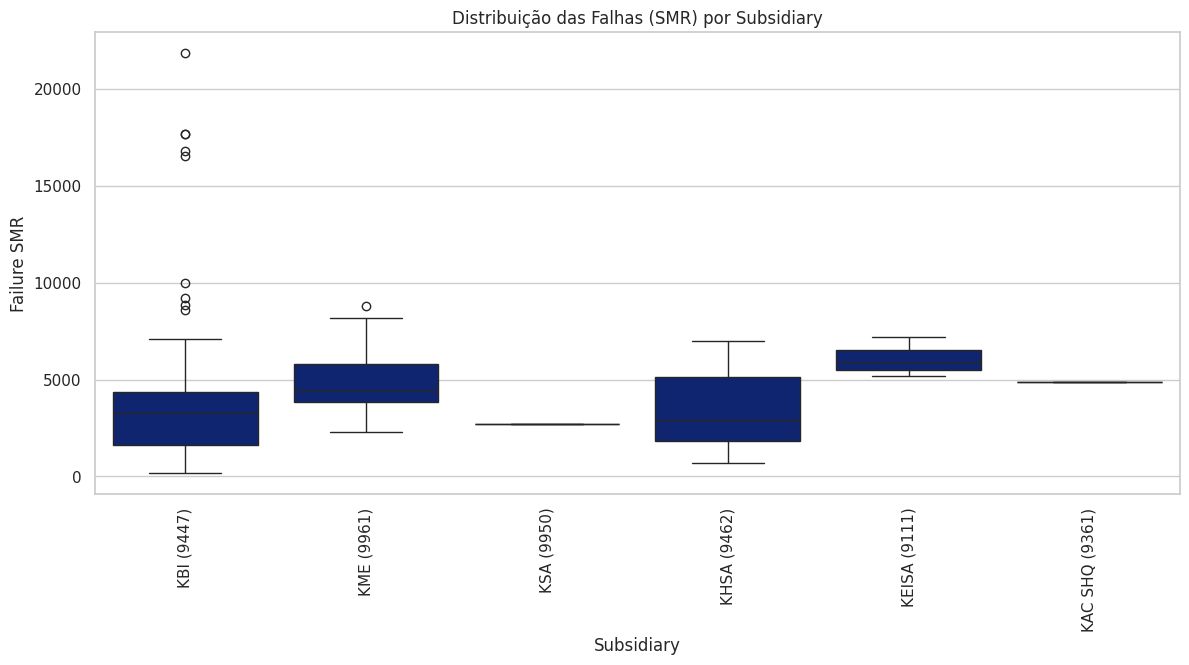

Resumo da análise por Distributor e Subsidiary:


,Distributor,Subsidiary,total_failures,avg_smr_failure,min_smr_failure,max_smr_failure
0,"ALJ MACHINERY TRADING CO.,LTD. (5258)",KME (9961),2,7540.500000,6887.0,8194.0
1,Automaq (2281),KHSA (9462),3,3698.000000,684.0,5946.0
2,BAUKO (213SPA),KBI (9447),14,3450.571429,511.0,6633.0
3,BIA NL (429R),KEISA (9111),1,6633.000000,6633.0,6633.0
4,CMarket (2213),KHSA (9462),1,1700.000000,1700.0,1700.0
5,DCCO (213GOC),KBI (9447),15,2457.133333,171.0,4891.0
6,F.W.MAQUINAS (213PEA),KBI (9447),7,3865.000000,1576.0,6920.0
7,Igarreta Maquinas (211A),KHSA (9462),2,3693.500000,2771.0,4616.0
8,KMEX (225K),KHSA (9462),2,5370.000000,4257.0,6483.0
9,KOMATSU FRANCE (420U),KEISA (9111),1,5468.000000,5468.0,5468.0


In [2]:

# ============================================================
#   IMPORTAÇÕES
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="dark")


# ============================================================
#   DOWNLOAD DO ARQUIVO DIRETO DO GITHUB (RAW)
# ============================================================

# Link CORRETO usando ?raw=true
url = "https://github.com/CidClayQuirino/TrincaBracoPC360_PC350/blob/main/PC350LC_PC360LC-8M2_Crack.xlsx?raw=true"

df = pd.read_excel(url)
print("Arquivo carregado com sucesso!")
df.head()


# ============================================================
#   PRÉ-PROCESSAMENTO
# ============================================================

# Conversão de datas
df["Failure Date"] = pd.to_datetime(df["Failure Date"], errors="coerce")
df["Machine Manufacturing Date"] = pd.to_datetime(df["Machine Manufacturing Date"], errors="coerce")

# Remover linhas sem SMR
df = df[df["Failure SMR"].notna()]

print("Total de registros após limpeza:", len(df))


# ============================================================
#   1. TENDÊNCIA DE FALHAS × FAILURE SMR
# ============================================================
plt.figure(figsize=(12,6))
sns.lineplot(x=df["Failure SMR"], y=range(len(df)), marker="o")
plt.title("Tendência de falhas ao longo do SMR", fontsize=14)
plt.xlabel("Failure SMR (Horas)")
plt.ylabel("Quantidade acumulada de falhas")
plt.show()


# ============================================================
#   2. DISTRIBUIÇÃO DAS FALHAS POR FAILURE SMR
# ============================================================
plt.figure(figsize=(12,6))
sns.histplot(df["Failure SMR"], kde=True, bins=35)
plt.title("Distribuição de falhas por Failure SMR")
plt.xlabel("Failure SMR (Horas)")
plt.ylabel("Frequência")
plt.show()


# ============================================================
#   3. DISPERSÃO: FAILURE DATE × MANUFACTURING DATE
# ============================================================
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Machine Manufacturing Date", y="Failure Date", hue="Full Model")
plt.title("Dispersão: Data de Falha × Data de Fabricação")
plt.xlabel("Data de Fabricação")
plt.ylabel("Data de Falha")
plt.xticks(rotation=45)
plt.show()


# ============================================================
#   4. DISPERSÃO POR COMPONENTE × SMR
# ============================================================
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Component Name", y="Failure SMR")
plt.title("Dispersão de SMR por Componente")
plt.xticks(rotation=90)
plt.show()


# ============================================================
#   5. ANÁLISE POR DISTRIBUTOR
# ============================================================
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Distributor", y="Failure SMR")
plt.title("Distribuição das Falhas (SMR) por Distribuidor")
plt.xticks(rotation=90)
plt.show()


# ============================================================
#   6. ANÁLISE POR SUBSIDIARY
# ============================================================
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Subsidiary", y="Failure SMR")
plt.title("Distribuição das Falhas (SMR) por Subsidiary")
plt.xticks(rotation=90)
plt.show()


# ============================================================
#   7. TABELA RESUMO POR DISTRIBUTOR E SUBSIDIARY
# ============================================================
summary = df.groupby(["Distributor", "Subsidiary"]).agg(
    total_failures=("Failure SMR", "count"),
    avg_smr_failure=("Failure SMR", "mean"),
    min_smr_failure=("Failure SMR", "min"),
    max_smr_failure=("Failure SMR", "max")
).reset_index()

print("Resumo da análise por Distributor e Subsidiary:")
summary


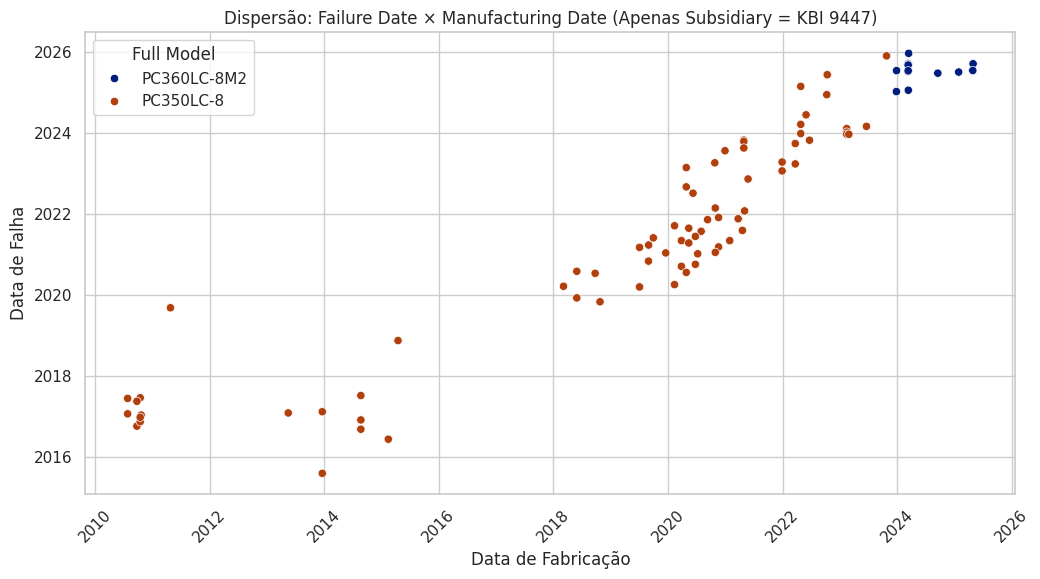

In [3]:

# ============================================================
#   3. DISPERSÃO: FAILURE DATE × MANUFACTURING DATE
#   (APENAS SUBSIDIARY = "KBI (9447)")
# ============================================================

df_kbi = df[df["Subsidiary"] == "KBI (9447)"]

plt.figure(figsize=(12,6))
sns.scatterplot(data=df_kbi,
                x="Machine Manufacturing Date",
                y="Failure Date",
                hue="Full Model")
plt.title("Dispersão: Failure Date × Manufacturing Date (Apenas Subsidiary = KBI 9447)")
plt.xlabel("Data de Fabricação")
plt.ylabel("Data de Falha")
plt.xticks(rotation=45)
plt.show()


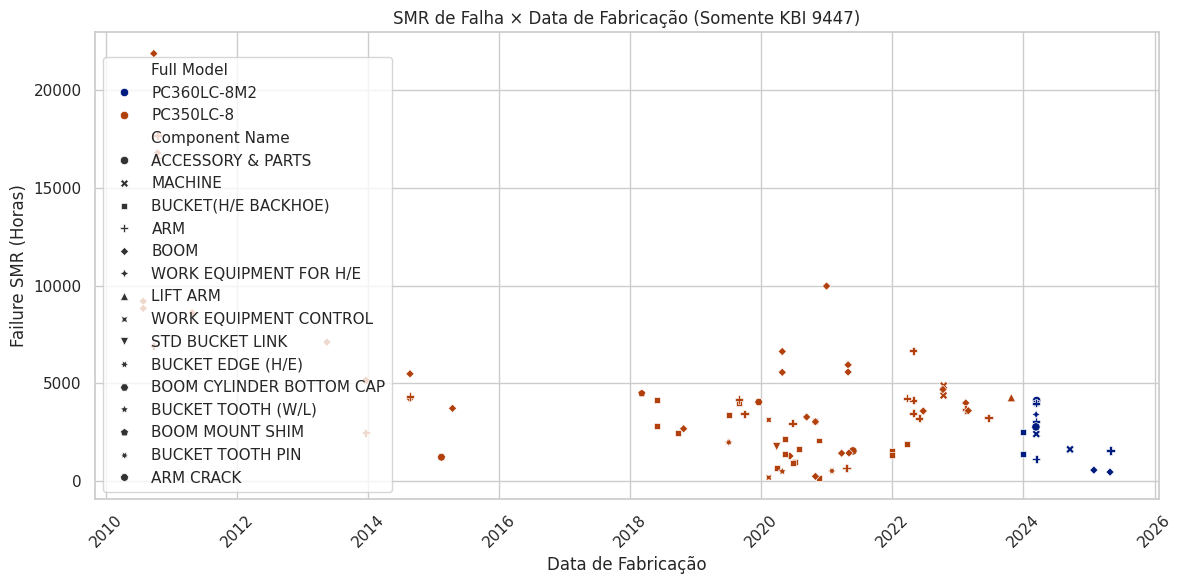

In [4]:

# ============================================================
#   DISPERSÃO: Manufacturing Date × Failure SMR
#   Apenas Subsidiary = "KBI (9447)"
# ============================================================

df_kbi = df[df["Subsidiary"] == "KBI (9447)"]

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_kbi,
    x="Machine Manufacturing Date",
    y="Failure SMR",
    hue="Full Model",
    style="Component Name"
)

plt.title("SMR de Falha × Data de Fabricação (Somente KBI 9447)")
plt.xlabel("Data de Fabricação")
plt.ylabel("Failure SMR (Horas)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


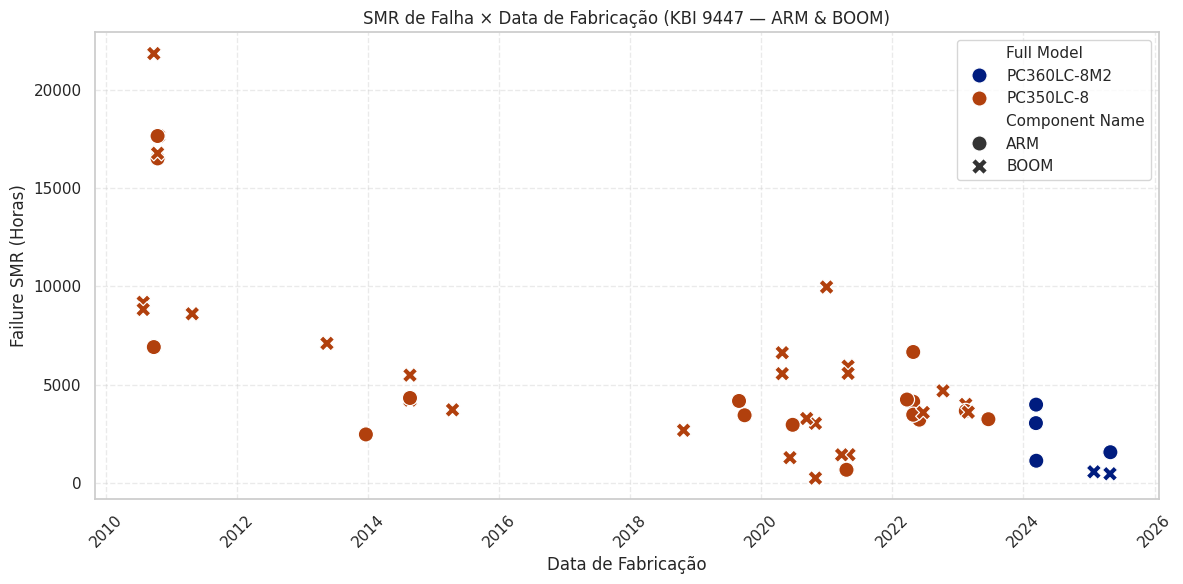

In [6]:

# ============================================================
#   DISPERSÃO: Manufacturing Date × Failure SMR
#   Filtrado para Subsidiary = "KBI (9447)"
#   E Component Name contendo apenas ARM e BOOM
# ============================================================

# Filtrar somente KBI (9447)
df_kbi = df[df["Subsidiary"] == "KBI (9447)"]

# Filtrar componentes ARM e BOOM
df_kbi_arm_boom = df_kbi[df_kbi["Component Name"].isin(["ARM", "BOOM"])]

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_kbi_arm_boom,
    x="Machine Manufacturing Date",
    y="Failure SMR",
    hue="Full Model",
    style="Component Name",
    s=120
)

plt.title("SMR de Falha × Data de Fabricação (KBI 9447 — ARM & BOOM)")
plt.xlabel("Data de Fabricação")
plt.ylabel("Failure SMR (Horas)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


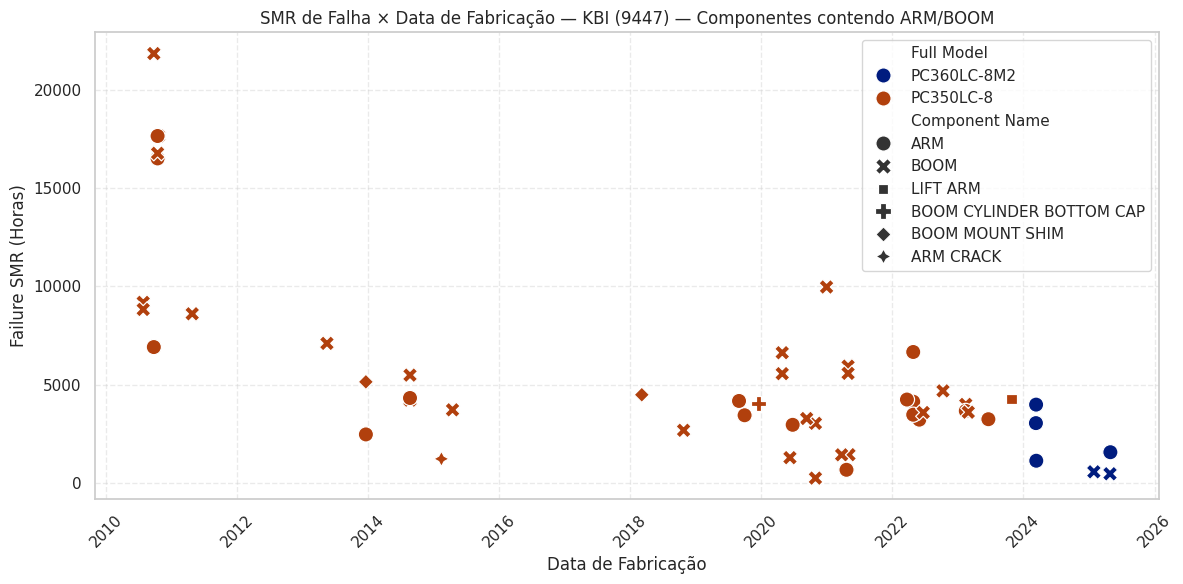

In [8]:

# ============================================================
#   DISPERSÃO: Manufacturing Date × Failure SMR
#   Filtrado para:
#     - Subsidiary = "KBI (9447)"
#     - Component Name contendo "ARM" ou "BOOM" (descrição, case-insensitive)
# ============================================================

# (Opcional) Garantir tipos e limpeza mínima
df["Failure SMR"] = pd.to_numeric(df["Failure SMR"], errors="coerce")
df["Failure Date"] = pd.to_datetime(df["Failure Date"], errors="coerce")
df["Machine Manufacturing Date"] = pd.to_datetime(df["Machine Manufacturing Date"], errors="coerce")

# Filtrar apenas KBI (9447)
df_kbi = df[df["Subsidiary"].astype(str).str.strip() == "KBI (9447)"]

# Filtrar Component Name que CONTÉM ARM ou BOOM (descrição)
mask_comp = (
    df_kbi["Component Name"]
      .astype(str)
      .str.upper()
      .str.contains(r"\bARM\b|\bBOOM\b", na=False)
)

df_plot = df_kbi[mask_comp].copy()

# (Opcional) Remover linhas sem datas/SMR para o gráfico
df_plot = df_plot[
    df_plot["Machine Manufacturing Date"].notna() &
    df_plot["Failure SMR"].notna()
]

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_plot,
    x="Machine Manufacturing Date",
    y="Failure SMR",
    hue="Full Model",
    style="Component Name",
    s=120
)

plt.title("SMR de Falha × Data de Fabricação — KBI (9447) — Componentes contendo ARM/BOOM")
plt.xlabel("Data de Fabricação")
plt.ylabel("Failure SMR (Horas)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

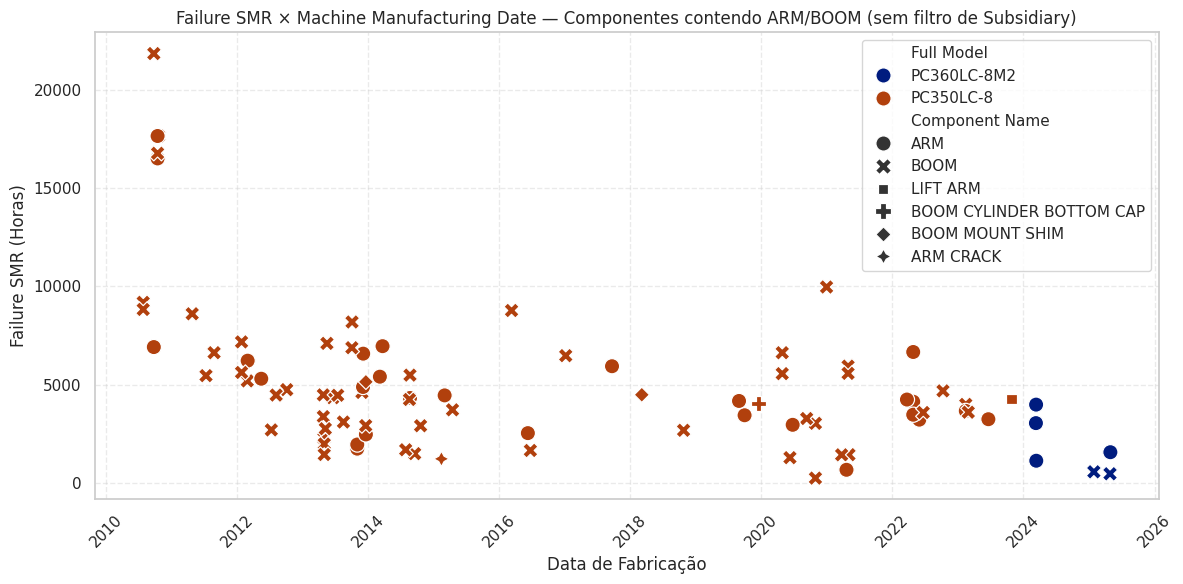

In [9]:

# ============================================================
#   DISPERSÃO: Manufacturing Date × Failure SMR
#   Filtro SOMENTE por Component Name contendo ARM ou BOOM
#   (sem filtro por Subsidiary)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="dark")

# --- (opcional) garantir tipos/limpeza mínima caso ainda não tenha sido feito
df["Failure SMR"] = pd.to_numeric(df["Failure SMR"], errors="coerce")
df["Failure Date"] = pd.to_datetime(df["Failure Date"], errors="coerce")
df["Machine Manufacturing Date"] = pd.to_datetime(df["Machine Manufacturing Date"], errors="coerce")

# --- filtro: Component Name que CONTÉM ARM ou BOOM (case-insensitive, robusto)
mask_comp = (
    df["Component Name"]
      .astype(str)
      .str.upper()
      .str.contains(r"\bARM\b|\bBOOM\b", na=False)
)

df_plot = df[mask_comp].copy()

# --- remover registros sem data de fabricação ou SMR
df_plot = df_plot[
    df_plot["Machine Manufacturing Date"].notna() &
    df_plot["Failure SMR"].notna()
]

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_plot,
    x="Machine Manufacturing Date",
    y="Failure SMR",
    hue="Full Model",
    style="Component Name",
    s=120
)

plt.title("Failure SMR × Machine Manufacturing Date — Componentes contendo ARM/BOOM (sem filtro de Subsidiary)")
plt.xlabel("Data de Fabricação")
plt.ylabel("Failure SMR (Horas)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
